1.	Read  red-wine.csv into Python as a data frame, use a pandas profiling tool

In [9]:
pip install ydata-profiling

Note: you may need to restart the kernel to use updated packages.


In [113]:
import pandas as pd
import pandas as pd
from ydata_profiling import ProfileReport

In [115]:
# Load your CSV file into a DataFrame
file_path = 'C:/Users/jteja/Desktop/Data_mining/Homeworks/./red_wine.csv'  # Update this to your CSV file path
df = pd.read_csv(file_path,low_memory=False)

In [117]:
profile = ProfileReport(df, title="Red wine data profiling report")

In [119]:
profile.to_file("red_wine_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

2.Fit a model using each of the following methods and report the performance metrics of 10-fold cross-validation using red-wine.csv as the training set 

In [67]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score

In [69]:
# Load your dataset
data = pd.read_csv('./red_wine.csv')  # Replace 'your_dataset.csv' with your actual dataset path
X = data.drop('type', axis=1)         # Replace 'target' with your actual target column name
y = data['type']


In [71]:
# Initialize models
models = {
    'Baseline': DummyClassifier(strategy="most_frequent"),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM (Linear Kernel)': SVC(kernel='linear', probability=True),
    'SVM (RBF Kernel)': SVC(kernel='rbf', probability=True),
    'Random Forest': RandomForestClassifier()
}


In [73]:
# Define evaluation metrics with response_method to avoid the deprecation warning
scoring = {
    'AUC': make_scorer(roc_auc_score, response_method="predict_proba"),
    'Accuracy': make_scorer(accuracy_score)
}

In [75]:
# Set up cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


In [77]:
# Store results
results = []

In [105]:
# Perform cross-validation for each model
for model_name, model in models.items():
    auc_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring['AUC'])
    accuracy_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring['Accuracy'])
    
    results.append({
        'Model': model_name,
        'AUC Mean': np.mean(auc_scores),
        'AUC Std': np.std(auc_scores),
        'Accuracy Mean': np.mean(accuracy_scores),
        'Accuracy Std': np.std(accuracy_scores)
    })


In [111]:
results_df  # This will display the DataFrame in a Jupyter Notebook


,Model,AUC Mean,AUC Std,Accuracy Mean,Accuracy Std
0,Baseline,0.500000,0.000000,0.528887,0.005553
1,Logistic Regression,0.875819,0.047091,0.784392,0.042037
2,Naive Bayes,0.893291,0.037503,0.824773,0.049228
3,Decision Tree,0.810785,0.054124,0.807199,0.052351
4,SVM (Linear Kernel),0.875446,0.047008,0.793134,0.051082
5,SVM (RBF Kernel),0.855024,0.045629,0.535844,0.013544
6,Random Forest,0.915577,0.027079,0.843890,0.062070


3.	Plot the ROC curve of the Random Forest classifier from the Python package, and paste a screenshot of your ROC curve here 

In [88]:
%matplotlib inline

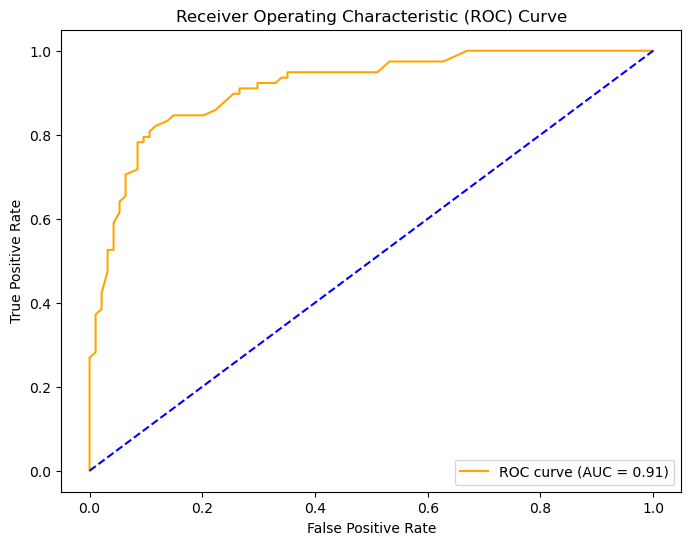

ROC AUC Score: 0.91
Accuracy: 0.85


In [90]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('./red_wine.csv')  # Replace with the actual path to your dataset

# Encode target labels if they are not binary (0 and 1)
le = LabelEncoder()
y = le.fit_transform(data['type'])  # Replace 'target' with the actual target column name
X = data.drop('type', axis=1)       # Adjust 'target' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)

# Calculate AUC and accuracy
auc = roc_auc_score(y_test, y_probs)
accuracy = accuracy_score(y_test, rf_model.predict(X_test))

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (AUC = {auc:.2f})')  # Match color to reference
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')  # Match reference dashed line color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC and accuracy
print(f"ROC AUC Score: {auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")


4.	Using the best model obtained above in Q2 (according to AUC), running the model on white-wine.csv, and reporting the AUC score, comment on the performance

AUC Score: 0.89


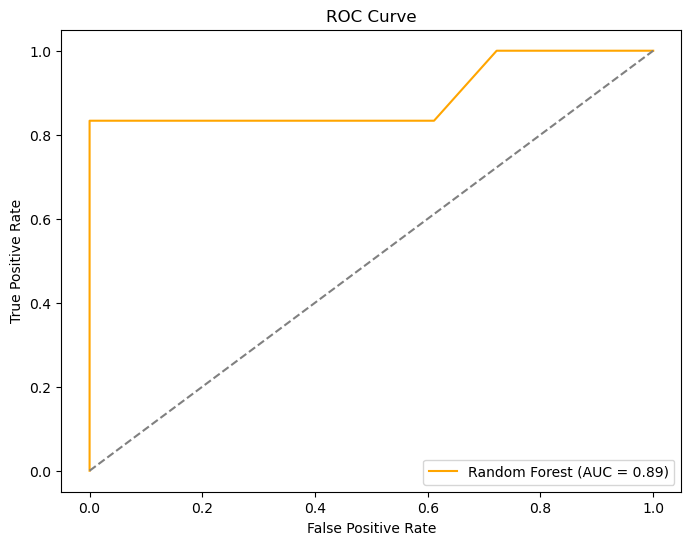

In [93]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your dataset
data = pd.read_csv('./white_wine.csv')  # Replace with the path to your dataset

# Encode target labels if they are not binary
le = LabelEncoder()
y = le.fit_transform(data['type'])  # Replace 'target' with the actual target column name
X = data.drop('type', axis=1)       # Adjust 'target' with your actual target column name

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict probabilities for the positive class
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class (1)


# Calculate AUC score
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC Score: {auc_score:.2f}")

# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
